In [54]:
%matplotlib inline

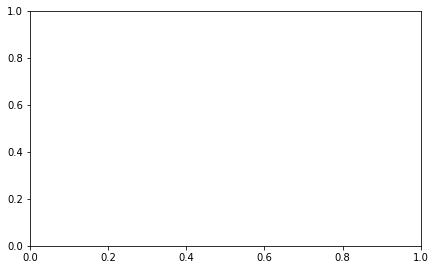

In [55]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt #For visualization
import matplotlib
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import display
from math import *

matplotlib.rc('animation', html='html5')
matplotlib.rcParams['image.cmap'] = 'jet'   #Set matshow colors to v 1.0 style
#set the plot aspect ratio and setup a default figure to use.
goldenratio=1/2*(1+sqrt(5)); fsx=7; fsy=fsx/goldenratio
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy));

In [56]:
m = 50
n = 20
empty = 0
bacterium = 1
dead = 2
border = 3
probInitBacteria = 0.5
diffusionRate = 0.1
p = 1
t = 125
maxnutrient = 1
consumed = 1

In [57]:
def initNutrientGrid(m,n, maxnutrient): 
    nutrientGrid= np.empty([m,n])
    nutrientGrid[:,:] = maxnutrient
    return(nutrientGrid)

nutrientGrid = initNutrientGrid(m,n,maxnutrient)
#print(nutrientGrid)

In [58]:
def initBacteriaGrid(m,n, probInitBacteria):
    emptyGrid = np.zeros([m,n])
    onSurface = np.zeros([m,n])
    for ii in range(0,m):
        number = random.random()
        if (number < probInitBacteria):
            onSurface[ii,0] = bacterium
    grid = emptyGrid + onSurface
    return(grid)

BacteriaGrid = initBacteriaGrid(m,n,probInitBacteria)
#print(BacteriaGrid)


In [59]:
def extendGrid(Grid): ##Make boundary rows and columns for bacteria array
    m = len(Grid)
    n = len(Grid[0])
    topBound = Grid[0,:]
    bottomBound = Grid[m-1,:]
    
    extendGrid = np.insert(Grid,m,bottomBound,axis=0)
    extendGrid = np.insert(extendGrid, 0,topBound, axis=0) #extend the N and S boundsaries
    
    extendGrid = np.insert(extendGrid,n,3,axis=1)
    extendGrid = np.insert(extendGrid, 0 ,3, axis=1) ##Left bound is the boundary condition

    return(extendGrid)

extendedBacteria = extendGrid(BacteriaGrid)

#print(BacteriaGrid)
#print(extendedBacteria)

In [60]:
def extendNutrientGrid(Grid): ##Make boundary rows and columns for nutrient
    m = len(Grid)
    n = len(Grid[0])
    topBound = Grid[0,:]
    bottomBound = Grid[m-1,:]
    
    extendGrid = np.insert(Grid,m,bottomBound,axis=0)
    extendGrid = np.insert(extendGrid, 0,topBound, axis=0) #extend the N and S boundsaries
    
    extendGrid = np.insert(extendGrid,n,1,axis=1)
    extendGrid = np.insert(extendGrid, 0 ,0, axis=1) ##Left bound is the boundary condition

    return(extendGrid)

extendedNutrient = extendNutrientGrid(nutrientGrid)

#print(nutrientGrid)
#print(extendedNutrient)

In [61]:
def diffusion(diffusionRate,site,N,NE,E,SE,S,SW,W,NW):
    return((1-8*diffusionRate)*site + diffusionRate*(N+NE+E+SE+S+SW+W+NW))

#diffusion(diffusionRate,1,1,1,1,1,1,1,1,1)


In [62]:
def applyDiffusionExtended(matExt, diffusionRate):
    for ii in range(1,m+1): ### Go through rows
        for jj in range(1,n+1): ## Go through Columns
            site = matExt[ii,jj]
            N = matExt[ii+1,jj]
            NE = matExt[ii+1,jj+1]
            E = matExt[ii,jj+1]
            SE = matExt[ii-1,jj+1]
            S = matExt[ii-1,jj]
            SW = matExt[ii-1,jj-1]
            W = matExt[ii,jj-1]
            NW = matExt[ii+1,jj-1]
            matExt[ii,jj] = diffusion(diffusionRate, site,N,NE,E,SE,S,SW,W,NW)
    return(matExt)

#applyDiffusionExtended(extendedNutrient, diffusionRate)

In [63]:
def pickNeighbor(i,j, N, S, E, W):
    newi = i
    newj = j
    directions = list()
    if N == 0:
        directions.append(1) #N
    if S == 0:
        directions.append(2) #S
    if E == 0:
        directions.append(3) #'E'
    if W == 0:
        directions.append(4) #'W'
    if len(directions) > 0:
        choice = random.choice(directions)
        if choice == 1: #N
            newi = i+1
            newj = j
        if choice == 2: #s
            newi = i-1
            newj = j
        if choice == 3: #e
            newi = i
            newj = j+1
        if choice == 4: #w
            newi = i
            newj = j-1
    return(newi,newj)

#newi, newj = pickNeighbor(2,2,0,0,0,0)
#print(newi)
#print(newj)

In [64]:
def probGrow(bacteriaGrid, nutritionGrid, p):
    sumNutrition = 0
    for ii in range(1,m+1): #rows
        for jj in range(1,n+1): #columns
            if bacteriaGrid[ii,jj]==1:
                sumNutrition = sumNutrition + nutritionGrid[ii,jj]
    if sumNutrition == 0:
        newProb = 0
    else:
        newProb = p/sumNutrition
    return(newProb)

#probGrow(extendedBacteria, extendedNutrient, p)

In [65]:
def grow(bacteriaGrid, nutritionGrid, p):
    prob = probGrow(bacteriaGrid, nutritionGrid, p)
    for ii in range(1,m+1):
        for jj in range(1,n+1):
            if bacteriaGrid[ii,jj] == bacterium:
                if nutritionGrid[ii,jj] <= 0:
                    bacteriaGrid[ii,jj] = dead
                if random.random() < prob*nutritionGrid[ii,jj]:
                    newi, newj = pickNeighbor(ii,jj,bacteriaGrid[ii+1,jj],bacteriaGrid[ii-1,jj],
                                              bacteriaGrid[ii,jj+1],bacteriaGrid[ii,jj-1]) #N, S, E, W
                    bacteriaGrid[newi, newj] = bacterium
    return(bacteriaGrid)
                
grew = grow(extendedBacteria, extendedNutrient, p)
#print(grew)

In [66]:
#print(extendedNutrient)
#print(extendedBacteria)

def consumption(bacteriaGrid, nutritionGrid):
    for ii in range(1,m+1):
        for jj in range(1,n+1):
            if bacteriaGrid[ii,jj] == bacterium:
                nutritionGrid[ii,jj] = nutritionGrid[ii,jj] - consumed
                if nutritionGrid[ii,jj] <= 0 :
                    nutritionGrid[ii,jj] = 0
    return(nutritionGrid)

#consumption(extendedBacteria, extendedNutrient)

In [67]:
def takeaway(bacteriaGrid):
    for ii in range(1,m+1):
        for jj in range(1,n+1):
            if jj >= 5:
                bacteriaGrid[ii,jj] = 0
    return(bacteriaGrid)

In [68]:
def biofilm(m,n,probInitBacteria, diffusionRate, p, t):
    bacGrid = extendGrid(initBacteriaGrid(m,n,probInitBacteria))
    nutGrid = extendNutrientGrid(initNutrientGrid(m,n,maxnutrient))
    
    nutTime = np.zeros((m+2, n+2, t+1))
    bacTime = np.zeros((m+2, n+2, t+1))
    population = np.zeros((t))
    totalNutrition = np.zeros((t))
    time = np.arange(1,t+1,1)
    
    nutTime[:,:,0] = nutGrid
    bacTime[:,:,0] = bacGrid
    
    for tt in range(1,t+1):
        bacGrid = extendGrid(bacGrid[1:m+1,1:n+1])
        nutGrid = extendNutrientGrid(nutGrid[1:m+1,1:n+1])
        
        nutGrid = applyDiffusionExtended(nutGrid, diffusionRate)
        bacGrid = grow(bacGrid, nutGrid, p)
        nutGrid = consumption(bacGrid,nutGrid)
        bacGrid = takeaway(bacGrid)
        
        populationCount = 0
        totalNutritionCount = 0
        for ii in range(1,m+1):
            for jj in range(1,n+1):
                if bacGrid[ii,jj] == 1:
                    populationCount = populationCount + 1
                if nutGrid[ii,jj] > 0:
                    totalNutritionCount = totalNutritionCount + nutGrid[ii,jj]
                #if jj >= 5: ### This is the depth limitation
                 #   bacGrid[ii,jj] == empty
        population[tt-1] = populationCount
        totalNutrition[tt-1] = totalNutritionCount
        
        nutTime[:,:,tt]=nutGrid
        bacTime[:,:,tt]=bacGrid
        
    return(nutTime, bacTime, time, population, totalNutrition)

nutrition, bacteria, time, population, totalNutrition = biofilm(m,n,probInitBacteria, diffusionRate, p, t)

#print(bacteria)
#print(nutrition)
#print(time)
#print(population)
#print(totalNutrition)

In [69]:
def makeColorGrid(grid, maxValue):
    m = grid.shape[0]
    n = grid.shape[1]
    colorGrid = np.zeros((m, n, 3))
    for i in range(m):
        for j in range(n):
            siteColorAmt = 255*grid[i, j]/maxValue
            colorGrid[i, j] = [siteColorAmt, 0, 255 - siteColorAmt]
    return colorGrid

#makeColorGrid(extendedBacteria,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


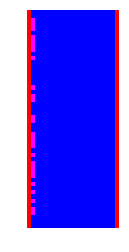

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams['animation.html'] = 'jshtml'
import matplotlib.animation
import numpy as np 
fig=plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGrid(bacteria[:,:,0], 2), animated=True)

def updatefig(i, *args):
    global bacteria
    im.set_array(makeColorGrid(bacteria[:,:,i], 2))
    return im,

ani = matplotlib.animation.FuncAnimation(fig, updatefig, save_count=t, interval = 100, blit=False)
ani

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


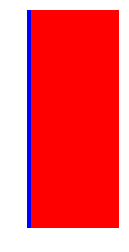

In [71]:
fig=plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGrid(nutrition[:,:,0], 1), animated=True)

def updatefig(i, *args):
    global bacteria
    im.set_array(makeColorGrid(nutrition[:,:,i], 1))
    return im,

ani = matplotlib.animation.FuncAnimation(fig, updatefig, save_count=t, interval = 100, blit=False)
ani

Text(0,0.5,'Population (unit)')

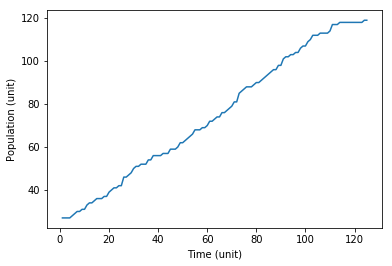

In [72]:
plt.plot(time, population)
plt.xlabel('Time (unit)')
plt.ylabel('Population (unit)')

Text(0,0.5,'Total Nutrition (unit)')

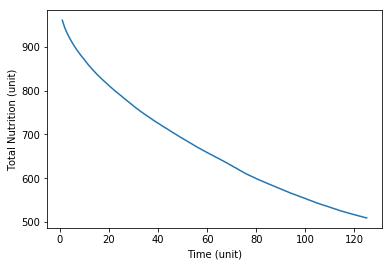

In [73]:
plt.plot(time, totalNutrition)
plt.xlabel('Time (unit)')
plt.ylabel('Total Nutrition (unit)')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


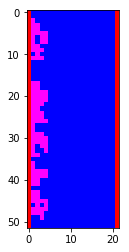

In [84]:
plt.imshow(makeColorGrid(bacteria[:,:,100], 2), animated=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


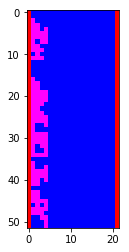

In [75]:
plt.imshow(makeColorGrid(bacteria[:,:,125], 2), animated=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


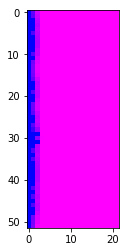

In [85]:
plt.imshow(makeColorGrid(nutrition[:,:,10], 125), animated=True)